## 图、节点和边

In [3]:
import dgl
import torch as th
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
u,v=th.tensor([0,0,0,1]),th.tensor([1,2,3,3])

In [5]:
g=dgl.graph((u,v))
gx=g.to_networkx()  

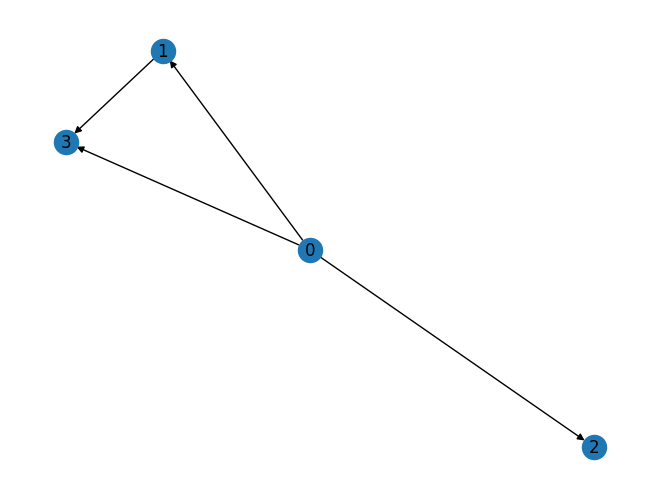

In [6]:
nx.draw(gx,with_labels=True)

In [36]:
print(g.nodes())

tensor([0, 1, 2, 3])


In [38]:
print(g.edges())

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))


In [55]:
print(g.edges(form='all'))


(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


In [56]:
g2=dgl.graph((u,v),num_nodes=8)

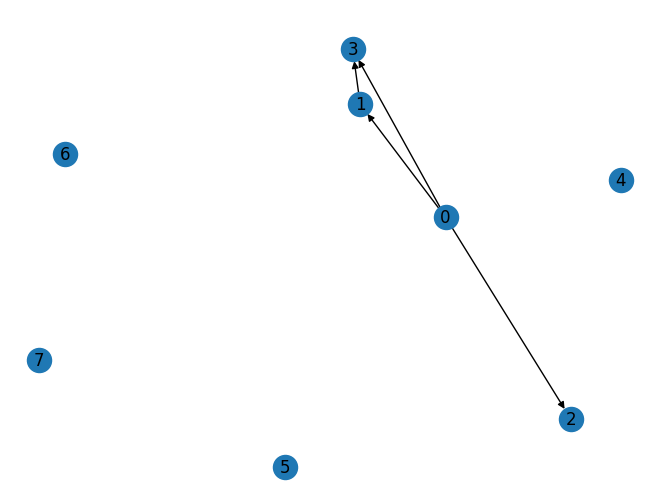

In [58]:
nx.draw(g2.to_networkx(),with_labels=True)

(tensor([0, 0, 0, 1, 1, 2, 3, 3]), tensor([1, 2, 3, 0, 3, 0, 0, 1]))


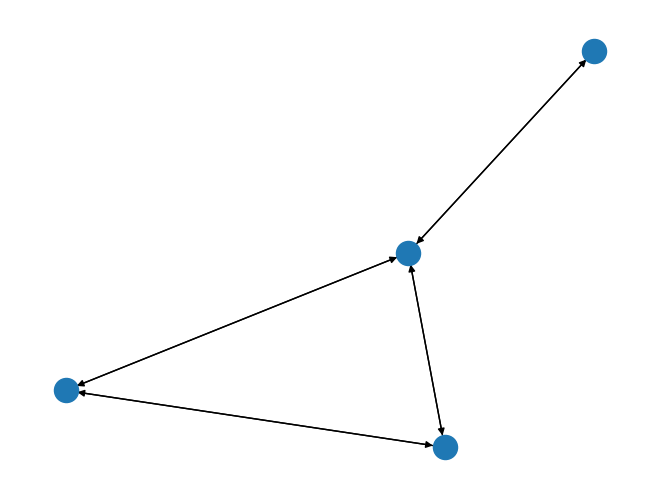

In [62]:
bg=dgl.to_bidirected(g)
print(bg.edges())
nx.draw(bg.to_networkx())

In [68]:
u,v=th.cat((u,v)),th.cat((v,u))

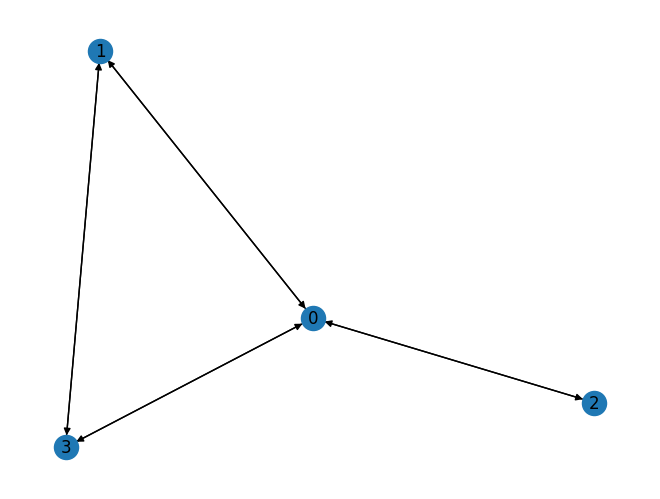

In [74]:
nx.draw(dgl.graph((u, v)).to_networkx(), with_labels=True)

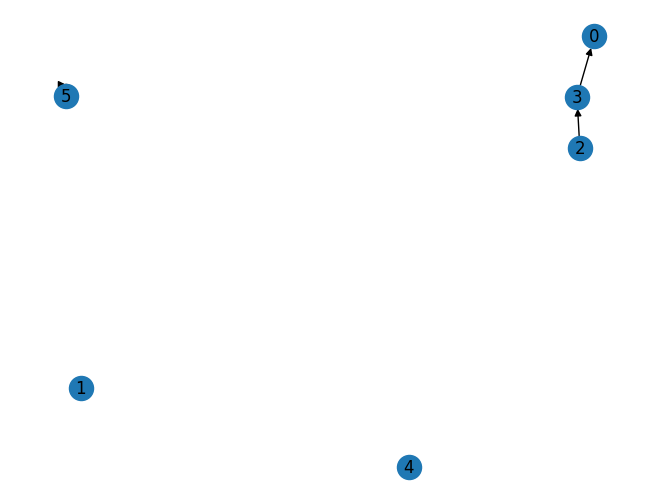

In [79]:
edges = th.tensor([2, 5, 3]), th.tensor([3, 5, 0])  # 边：2->3, 5->5, 3->0
g64 = dgl.graph(edges)  # DGL默认使用int64

nx.draw(g64.to_networkx(),with_labels=True)

## 节点和边的特征

In [82]:
g = dgl.graph(([0, 0, 1, 5], [1, 2, 2, 0])) # 6个节点，4条边
print(g)

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [117]:
g.ndata['x']=th.ones(g.num_nodes(),3)
g.edata['x'] = th.ones(g.num_edges(), dtype=th.int32)  # 标量整型特征

print(g)
print('ndata: ',g.ndata['x'])
print('edata: ',g.edata['x'])


Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})
ndata:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
edata:  tensor([1, 1, 1, 1], dtype=torch.int32)


In [134]:
g.ndata['y']=th.randn(g.num_nodes(),5)
g.edata['y']=th.ones((g.num_edges(),3))


In [135]:
print(g.ndata.keys())
print(g.ndata.values())

dict_keys(['x', 'y'])
dict_values([tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[ 0.0033,  0.3589, -0.7598,  0.9564,  0.6416],
        [-0.7341, -0.4010,  1.0804, -0.3562,  1.3609],
        [-0.6715, -1.2944,  0.9588, -2.4859, -0.3521],
        [-1.1097,  1.0000, -1.5751, -0.6560, -0.1674],
        [-0.2453,  1.1832, -0.6429, -1.2110,  0.0203],
        [ 0.5921,  0.7085,  0.3750,  0.5518,  0.2899]])])


In [136]:
print(g.edata.keys())
print(g.edata.values())

dict_keys(['x', 'y'])
dict_values([tensor([1, 1, 1, 1], dtype=torch.int32), tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])])


## 从外部源创建图


In [138]:
import scipy.sparse as sp

In [228]:
spmat=sp.random(50,50,density=0.1,dtype=int)

In [229]:
print(spmat.toarray(),'\n')
print(spmat.tocsr(),'\n')
print(spmat.tocsc(),'\n')
print(spmat.tocoo())

[[          0  1921670462           0 ...           0           0
            0]
 [          0           0           0 ...           0           0
  -1498142970]
 [          0           0           0 ...           0   474326430
            0]
 ...
 [          0           0           0 ...           0           0
            0]
 [          0           0           0 ...           0           0
            0]
 [          0           0           0 ...           0           0
            0]] 

  (0, 1)	1921670462
  (0, 6)	60541029
  (0, 35)	-302440161
  (0, 38)	-760808969
  (1, 7)	1198792491
  (1, 38)	1957120944
  (1, 49)	-1498142970
  (2, 10)	-99726369
  (2, 22)	2057065087
  (2, 40)	-1667176315
  (2, 42)	-1754007283
  (2, 43)	-917067438
  (2, 48)	474326430
  (3, 9)	517048152
  (3, 30)	924717204
  (3, 32)	729330121
  (3, 33)	931612960
  (4, 0)	864722647
  (4, 18)	-1726803470
  (4, 19)	-40116638
  (4, 25)	459306692
  (5, 10)	1093113149
  (5, 15)	2087678031
  (5, 30)	2045666562
  (5, 33)	-614

Graph(num_nodes=50, num_edges=250,
      ndata_schemes={}
      edata_schemes={})


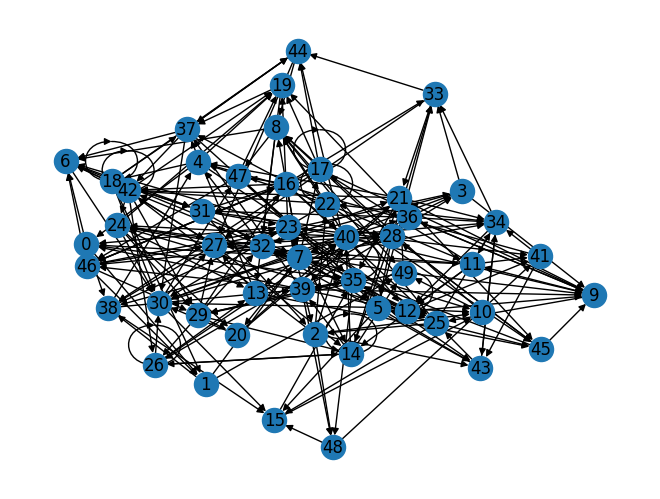

In [230]:
g_scipy=dgl.from_scipy(spmat)
print(g_scipy)
nx.draw(dgl.to_networkx(g_scipy),with_labels=True)

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

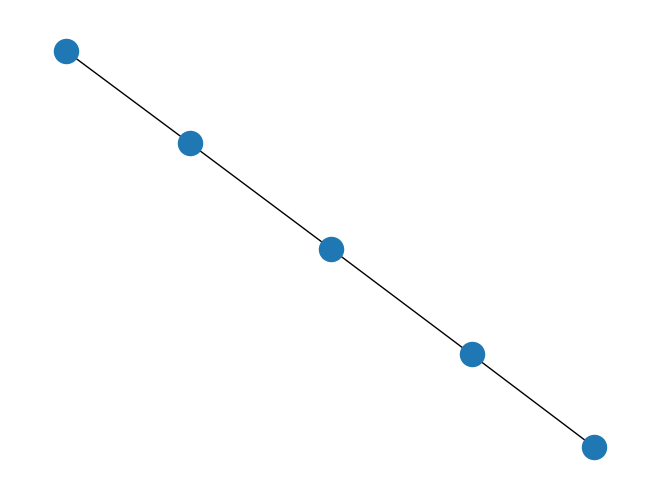

In [221]:
nx_g=nx.path_graph(5)
nx.draw(nx_g)
dgl.from_networkx(nx_g)

## 异构图

In [231]:
graph_data = {
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
}

In [242]:
hg=dgl.heterograph(graph_data)

In [259]:
print(hg.ntypes,'\n')
print(hg.canonical_etypes,'\n')
print(hg.etypes)

['disease', 'drug', 'gene'] 

[('drug', 'interacts', 'drug'), ('drug', 'interacts', 'gene'), ('drug', 'treats', 'disease')] 

['interacts', 'interacts', 'treats']


In [339]:
data={
    ('user','follow','user'):(th.tensor([0]),th.tensor([1])),
    ('user','play','game'):(th.tensor([0,0,1,1]),th.tensor([0,1,1,2]))
}

In [340]:
hg2=dgl.heterograph(data)

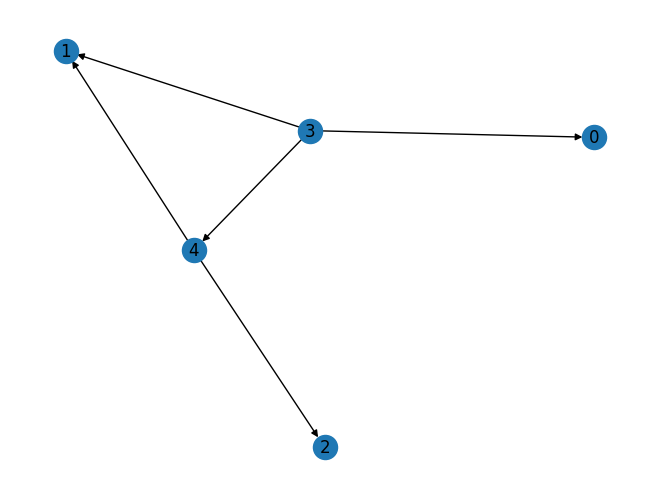

In [341]:
nx.draw(dgl.to_networkx(hg2),with_labels=True)

In [427]:
print('types of nodes',hg2.metagraph().number_of_nodes())
print('types of edges',hg2.metagraph().number_of_edges())
print(hg2.num_nodes())
print(hg2.num_nodes())
print(hg2.num_nodes('user'))
print(hg2.num_edges(('user','follow','user')))
print(hg2.num_edges('play'))

types of nodes 2
types of edges 2
5
5
2
1
4


In [363]:
print(hg2.nodes('user'))
print(hg2.nodes('game'))


tensor([0, 1])
tensor([0, 1, 2])


In [380]:
hg2.nodes['user'].data['kda']=th.ones(hg2.num_nodes('user'),3)

In [382]:
hg2.nodes['user'].data['kda']

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [393]:
# del(hg2.nodes['user'].data['time'])
hg2.nodes['user'].data

{'kda': tensor([[1., 1., 1.],
        [1., 1., 1.]])}

In [430]:
# hg2.edges[('user','play','game')]
hg2.edges['play'].data['hours']=th.ones(hg2.num_edges('play'),1)

In [433]:
hg2.edges['play'].data

{'hours': tensor([[1.],
        [1.],
        [1.],
        [1.]])}

In [443]:
sub_hg2=dgl.edge_type_subgraph(hg2,[('user','play','game')])

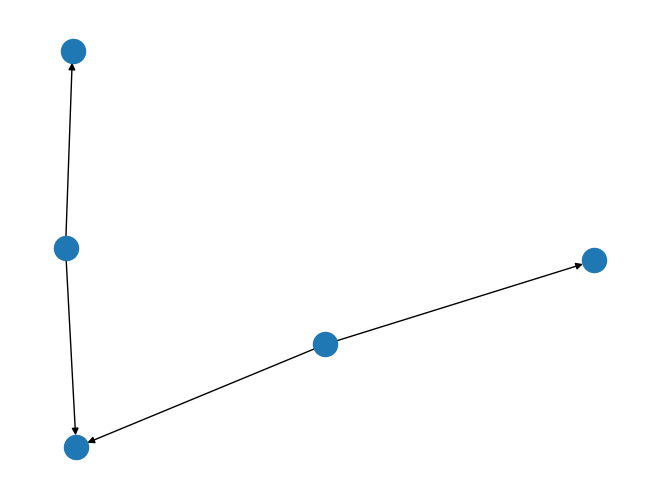

In [446]:
nx.draw(dgl.to_networkx(sub_hg2))

In [458]:
sub_hg2.nodes['user']

NodeSpace(data={'kda': tensor([[1., 1., 1.],
        [1., 1., 1.]])})

In [476]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))})
g.nodes['drug'].data['hv'] = th.zeros(3, 1)
g.nodes['disease'].data['hv'] = th.ones(3, 1)
g.edges['interacts'].data['he'] = th.zeros(2, 1)
g.edges['treats'].data['he'] = th.zeros(1, 2)

In [474]:
dgl.to_homogeneous(g)

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})

In [483]:
homo_g=dgl.to_homogeneous(g, ndata=['hv'])
homo_g

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})

In [485]:
homo_g.ndata

{'hv': tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]]), '_ID': tensor([0, 1, 2, 0, 1, 2]), '_TYPE': tensor([0, 0, 0, 1, 1, 1])}

In [506]:
print(homo_g.ndata[ dgl.NTYPE])
# homo_g.ndata
print(homo_g.ndata[dgl.NID])
print(g.etypes)
print(homo_g.edata[dgl.ETYPE])
print(homo_g.edata[dgl.EID])

tensor([0, 0, 0, 1, 1, 1])
tensor([0, 1, 2, 0, 1, 2])
['interacts', 'treats']
tensor([0, 0, 1])
tensor([0, 1, 0])


In [539]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})
sub_g = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),
                                   ('drug', 'interacts', 'gene')])
h_sub_g = dgl.to_homogeneous(sub_g)
h_sub_g

Graph(num_nodes=7, num_edges=4,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})

## GPU

In [7]:
u, v = th.tensor([0, 1, 2]), th.tensor([2, 3, 4])
g = dgl.graph((u, v))
g.ndata['x'] = th.randn(5, 3)   # 原始特征在CPU上
g.edata['x']=th.randn(g.num_edges(),3)

In [8]:
device = ("cuda" if th.cuda.is_available() else 'cpu')

In [15]:
cuda_g=g.to(device)

In [19]:
cuda_g.ndata['x']

tensor([[ 1.0917,  1.2016,  0.0800],
        [ 0.2609,  0.4324,  1.6323],
        [-0.2033, -1.3875,  0.9016],
        [ 0.7886, -0.6487,  0.3164],
        [-1.4703,  0.4042, -0.0511]], device='cuda:0')

In [22]:
u, v = u.to('cuda:0'), v.to('cuda:0')

In [23]:
g=dgl.graph((u,v))

In [24]:
g.device

device(type='cuda', index=0)

In [27]:
cuda_g.in_degrees()

tensor([0, 0, 1, 1, 1], device='cuda:0')

In [28]:
cuda_g.in_degrees([0,2,4])

tensor([0, 1, 1], device='cuda:0')

In [30]:
cuda_g.ndata['h']=th.rand(cuda_g.num_nodes(),3).cuda()

In [33]:
cuda_g.ndata

{'x': tensor([[ 1.0917,  1.2016,  0.0800],
        [ 0.2609,  0.4324,  1.6323],
        [-0.2033, -1.3875,  0.9016],
        [ 0.7886, -0.6487,  0.3164],
        [-1.4703,  0.4042, -0.0511]], device='cuda:0'), 'h': tensor([[0.1000, 0.4005, 0.5636],
        [0.9784, 0.6133, 0.7934],
        [0.6111, 0.7940, 0.4761],
        [0.2540, 0.7287, 0.2097],
        [0.8953, 0.0520, 0.0707]], device='cuda:0')}